# HW #3 - Supervised Learning

## Common Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

## Dataload

In [2]:
import requests
import io
# # Load your dataset
url = 'https://raw.githubusercontent.com/wortcook/UMKC/refs/heads/main/Fall2024/CS5530-0005/hw2/diamonds_casestudy.csv'
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))
df.head()

,carat,cut,color,clarity,depth,table,price,width,length,height
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


##Data Cleaning
Determine missing values

In [3]:
#Check for na data
df.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth      50
table       0
price       0
width       0
length      0
height      0
dtype: int64

Because there are only 50 missing values, we'll drop them

In [4]:
#drop missing data
df.dropna(inplace=True)
df.isnull().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
width      0
length     0
height     0
dtype: int64

## Data Exploration
Drop the columns we are not interested in and pairplot to get a visualization.


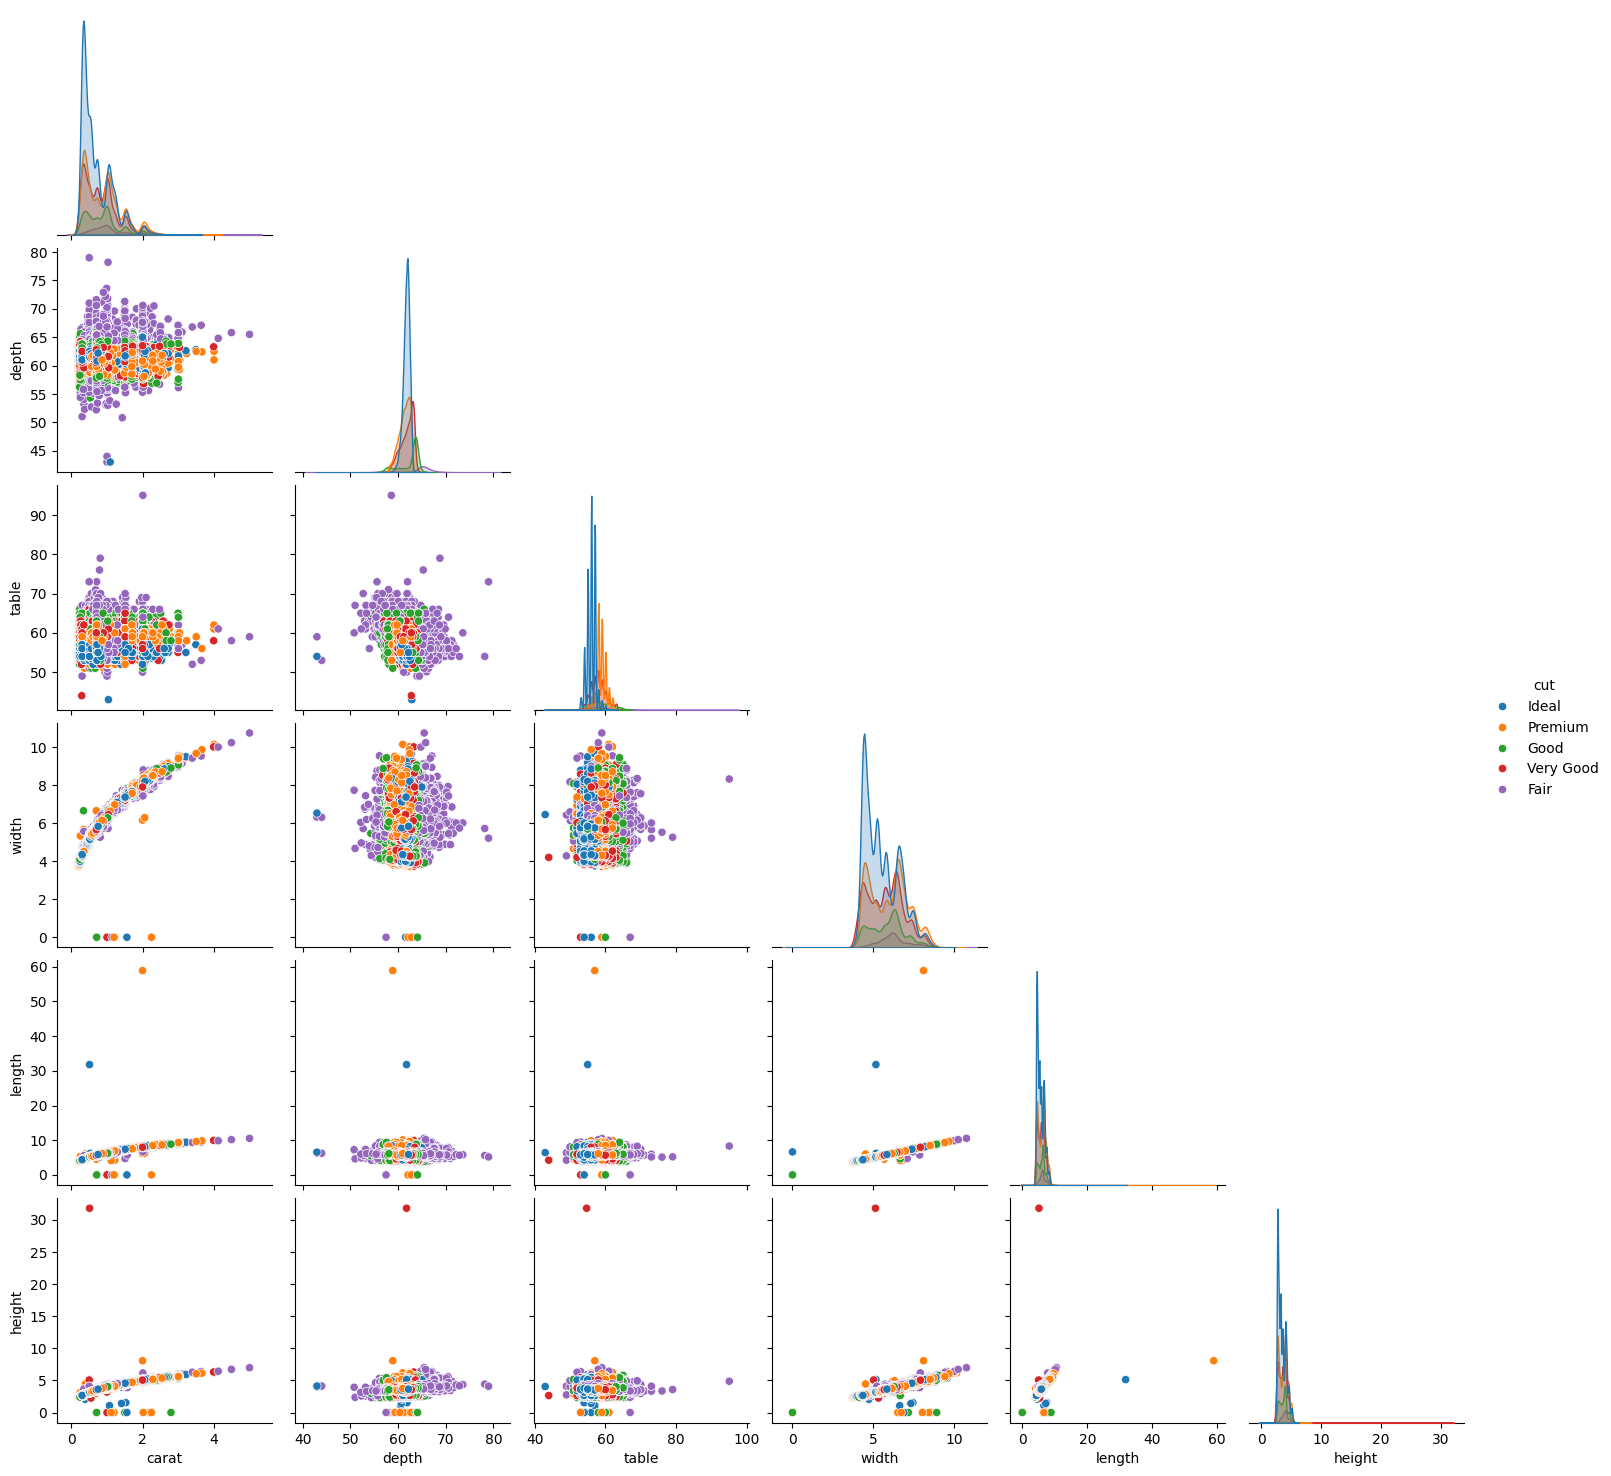

In [5]:

#Get a visualization of the different scatters across the different
#pairs of data
df = df.drop(['color', 'clarity', 'price'], axis=1)

sns.pairplot(df, hue='cut', corner=True)
plt.show()



## Create the test-train data split so we can compare results

In [6]:
#Scale the data
scaler = StandardScaler()

#drop the category columns before we scale as well a price (we don't use price)
df_scaled = scaler.fit_transform(df.drop(['cut'], axis=1))
df_scaled = pd.DataFrame(df_scaled)

df_cut = df['cut']

#Create test and train data, using 80/20
data_train, data_test, cut_train, cut_test = train_test_split(df_scaled, df_cut, test_size=0.2, random_state=42)

## KNN Analysis

*********************************
k =  3
Accuracy:  0.7125626275746891
Confusion Matrix: 
 [[ 297   39    4    6    4]
 [  46  624   28   64  200]
 [   1   19 3847  195  287]
 [   5   89  417 1903  316]
 [   7  241  622  508 1009]]

Classification Report: 
               precision    recall  f1-score   support

        Fair       0.83      0.85      0.84       350
        Good       0.62      0.65      0.63       962
       Ideal       0.78      0.88      0.83      4349
     Premium       0.71      0.70      0.70      2730
   Very Good       0.56      0.42      0.48      2387

    accuracy                           0.71     10778
   macro avg       0.70      0.70      0.70     10778
weighted avg       0.70      0.71      0.70     10778

*********************************

*********************************
k =  5
Accuracy:  0.7243458897754685
Confusion Matrix: 
 [[ 290   46    4    5    5]
 [  35  618   19   97  193]
 [   1    9 3934  199  206]
 [   1   59  371 2040  259]
 [   2  200  60

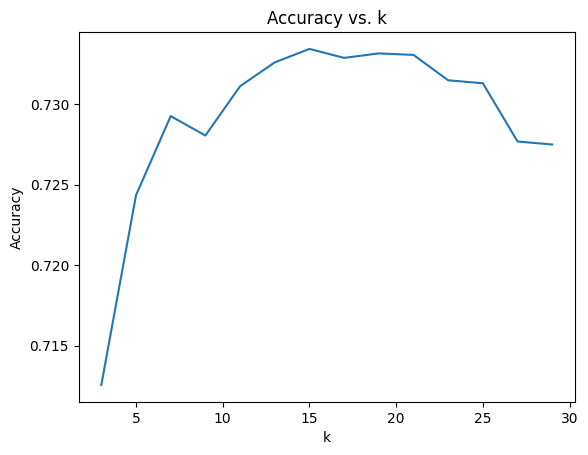

In [7]:
#KNN analysis
from sklearn.neighbors import KNeighborsClassifier

accuracies = []
for k in range(3, 30, 2):
  print('*********************************')
  print('k = ', k)
  # create, train, and test, the KNN classifier
  knn_classifier = KNeighborsClassifier(n_neighbors=k)
  knn_classifier.fit(data_train, cut_train)
  knn_predictions = knn_classifier.predict(data_test)

  #evaluate and short test results
  knn_accuracty = metrics.accuracy_score(cut_test, knn_predictions)

  knn_confusion = metrics.confusion_matrix(cut_test, knn_predictions)
  print('Accuracy: ', knn_accuracty)
  print('Confusion Matrix: \n', knn_confusion)
  print()
  print('Classification Report: \n',metrics.classification_report(cut_test, knn_predictions))
  print('*********************************')
  print()
  accuracies.append(knn_accuracty)

#Plot the accuracies
plt.plot(range(3, 30, 2), accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k')
plt.show()



## Naive Bayes

In [8]:
#Create the classifier
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

#Fit the data
nb.fit(data_train, cut_train)

#predict the data
nb_cut_predictions = nb.predict(data_test)

#evaluate
nb_cut_accuracy = metrics.accuracy_score(cut_test, nb_cut_predictions)
print('Accuracy: ', nb_cut_accuracy)

nb_cut_confusion = metrics.confusion_matrix(cut_test, nb_cut_predictions)
print('Confusion Matrix: \n', nb_cut_confusion)





Accuracy:  0.5938021896455743
Confusion Matrix: 
 [[ 126  193    5    4   22]
 [  67  197  137  165  396]
 [  19    4 3775  481   70]
 [  10   28  603 1796  293]
 [  22   82  927  850  506]]


## Support Vector Machine

In [9]:
from sklearn.svm import SVC

### Linear

In [ ]:
#SVN
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
log_C_values = np.log10(C_values)
lc_accuracies = []
for C in C_values:
  print('*********************************')
  print('C = ', C)
  linear_cut_model = SVC(kernel='linear', C=C) #create the model
  linear_cut_model.fit(data_train, cut_train) #train the model
  linear_cut_predictions = linear_cut_model.predict(data_test) #test the model

  #Get metrics
  linear_cut_accuracy = metrics.accuracy_score(cut_test, linear_cut_predictions)
  cut_cm = metrics.confusion_matrix(cut_test, linear_cut_predictions)
  cut_report = metrics.classification_report(cut_test, linear_cut_predictions)

  #Print metrics
  print('Accuracy: ', linear_cut_accuracy)
  print('Confusion Matrix: \n', cut_cm)
  print('Classification Report: \n', cut_report)
  lc_accuracies.append(linear_cut_accuracy)

#Plot the accuracies vs C values
plt.plot(log_C_values, lc_accuracies)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C')
plt.show()



*********************************
C =  0.0001


/Users/thomasjones/.pyenv/versions/3.10.15/envs/MLExp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/thomasjones/.pyenv/versions/3.10.15/envs/MLExp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/thomasjones/.pyenv/versions/3.10.15/envs/MLExp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

Accuracy:  0.5499164965670811
Confusion Matrix: 
 [[   0    0  205  130   15]
 [   0    0  495  467    0]
 [   0    0 4188  161    0]
 [   0    0  991 1739    0]
 [   0    0 1487  900    0]]
Classification Report: 
               precision    recall  f1-score   support

        Fair       0.00      0.00      0.00       350
        Good       0.00      0.00      0.00       962
       Ideal       0.57      0.96      0.71      4349
     Premium       0.51      0.64      0.57      2730
   Very Good       0.00      0.00      0.00      2387

    accuracy                           0.55     10778
   macro avg       0.22      0.32      0.26     10778
weighted avg       0.36      0.55      0.43     10778

*********************************
C =  0.001


/Users/thomasjones/.pyenv/versions/3.10.15/envs/MLExp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/thomasjones/.pyenv/versions/3.10.15/envs/MLExp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/thomasjones/.pyenv/versions/3.10.15/envs/MLExp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

Accuracy:  0.6125440712562628
Confusion Matrix: 
 [[  66    0   60   75  149]
 [   1    0  288  402  271]
 [   1    0 4096  207   45]
 [   0    0  339 2031  360]
 [   0    0 1008  970  409]]
Classification Report: 
               precision    recall  f1-score   support

        Fair       0.97      0.19      0.32       350
        Good       0.00      0.00      0.00       962
       Ideal       0.71      0.94      0.81      4349
     Premium       0.55      0.74      0.63      2730
   Very Good       0.33      0.17      0.23      2387

    accuracy                           0.61     10778
   macro avg       0.51      0.41      0.40     10778
weighted avg       0.53      0.61      0.55     10778

*********************************
C =  0.01


/Users/thomasjones/.pyenv/versions/3.10.15/envs/MLExp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/thomasjones/.pyenv/versions/3.10.15/envs/MLExp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/thomasjones/.pyenv/versions/3.10.15/envs/MLExp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

Accuracy:  0.6412135832250881
Confusion Matrix: 
 [[ 167    0   30   71   82]
 [  24    0  250  371  317]
 [   1    0 4057  196   95]
 [   0    0  317 2043  370]
 [   0    0  859  884  644]]
Classification Report: 
               precision    recall  f1-score   support

        Fair       0.87      0.48      0.62       350
        Good       0.00      0.00      0.00       962
       Ideal       0.74      0.93      0.82      4349
     Premium       0.57      0.75      0.65      2730
   Very Good       0.43      0.27      0.33      2387

    accuracy                           0.64     10778
   macro avg       0.52      0.49      0.48     10778
weighted avg       0.56      0.64      0.59     10778

*********************************
C =  0.1
Accuracy:  0.6600482464279087
Confusion Matrix: 
 [[ 188    8   37   73   44]
 [  36   13  246  319  348]
 [   1    0 4046  104  198]
 [   0    0  385 1934  411]
 [   0    0  932  522  933]]
Classification Report: 
               precision    recall  f

### Poly

In [ ]:
pc_accuracies = []
for degree in [2, 3, 4, 5, 6, 7, 8]:
  cut_model = SVC(kernel='poly', C=1, degree=degree) #create the model
  cut_model.fit(data_train, cut_train) #train the model
  cut_predictions = cut_model.predict(data_test) #test the model

  #Get metrics
  cut_accuracy = metrics.accuracy_score(cut_test, cut_predictions)
  cut_cm = metrics.confusion_matrix(cut_test, cut_predictions)
  cut_report = metrics.classification_report(cut_test, cut_predictions)

  #Print metrics
  print('Accuracy: ', cut_accuracy)
  print('Confusion Matrix: \n', cut_cm)
  print('Classification Report: \n', cut_report)
  pc_accuracies.append(cut_accuracy)

#Plot the accuracies vs C values
plt.plot([2, 3, 4, 5, 6, 7, 8], pc_accuracies)
plt.xlabel('degree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. degree')
plt.show()

### Radial

In [ ]:
rc_accuracies = []
for C in C_values:
  cut_model = SVC(kernel='poly', C=C) #create the model
  cut_model.fit(data_train, cut_train) #train the model
  cut_predictions = cut_model.predict(data_test) #test the model

  #Get metrics
  cut_accuracy = metrics.accuracy_score(cut_test, cut_predictions)
  cut_cm = metrics.confusion_matrix(cut_test, cut_predictions)
  cut_report = metrics.classification_report(cut_test, cut_predictions)

  #Print metrics
  print('Accuracy: ', cut_accuracy)
  print('Confusion Matrix: \n', cut_cm)
  print('Classification Report: \n', cut_report)
  pc_accuracies.append(cut_accuracy)

#Plot the accuracies vs C values
plt.plot(log_C_values, rc_accuracies)
plt.xlabel('log(C)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. log(C)')
plt.show()